# ESTI019 - CSM - QS2021
# LAB5 - Percepção Auditiva e Básico de Áudio

In [1]:
import numpy as np
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import IPython.display
import time

## Audiometria

In [2]:
# Download de arquivos
!gdown --id 1WxnYB7PbFe3M8O_yGKta65vI9ys1QeXr
!gdown --id 1B9uSNzvVkf9ddkVv58Mg7KeztyGqD-Qb
!gdown --id 1cj1k_P-Ql0KvnrD2cIOYwUtLNsM5ZVC4
!gdown --id 1wpP2EZb8DCFpUsr-B9L3C2DZoUJ5rZV3

Downloading...
From: https://drive.google.com/uc?id=1WxnYB7PbFe3M8O_yGKta65vI9ys1QeXr
To: /content/audiogram_Heitor_caixa.png
100% 158k/158k [00:00<00:00, 75.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1B9uSNzvVkf9ddkVv58Mg7KeztyGqD-Qb
To: /content/audiogram_Heitor_fone.png
100% 175k/175k [00:00<00:00, 58.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cj1k_P-Ql0KvnrD2cIOYwUtLNsM5ZVC4
To: /content/audiogram_Luiz_caixa.png
100% 173k/173k [00:00<00:00, 60.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wpP2EZb8DCFpUsr-B9L3C2DZoUJ5rZV3
To: /content/audiogram_Luiz_fone.png
100% 180k/180k [00:00<00:00, 62.8MB/s]


### Heitor

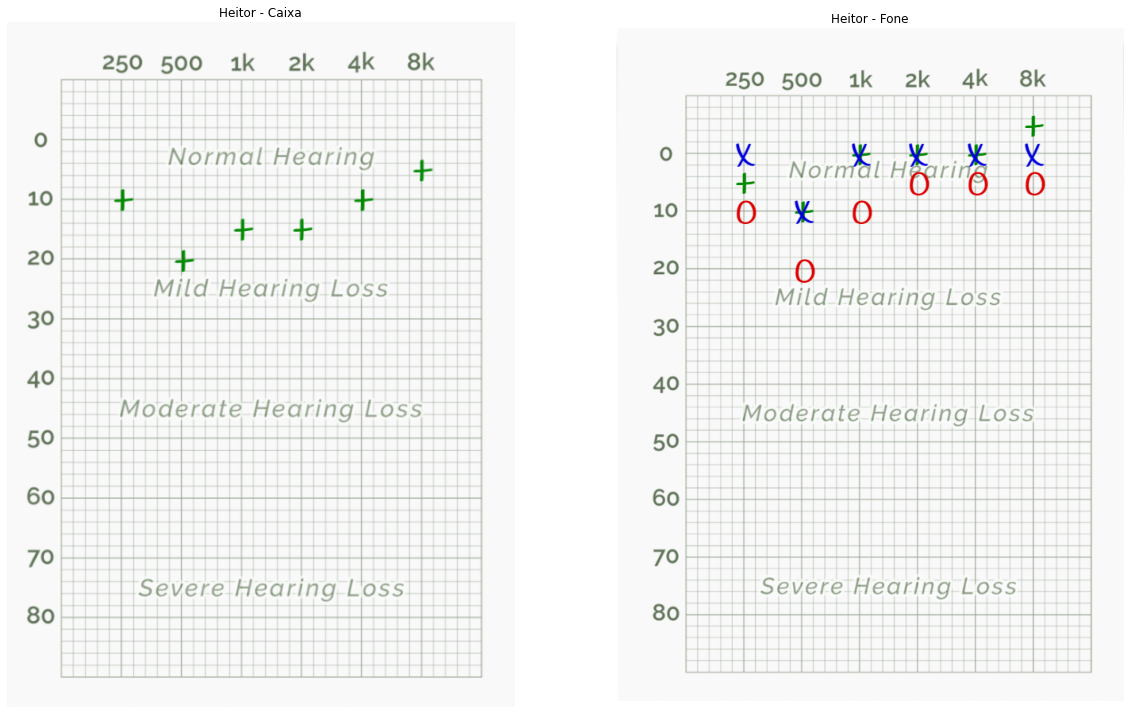

In [3]:
H_caixa = mpimg.imread(f"./audiogram_Heitor_caixa.png")
H_fone = mpimg.imread(f"./audiogram_Heitor_fone.png")

plt.figure(figsize=(20,40))
plt.subplot(1,2,1)
plt.imshow(H_caixa); plt.title("Heitor - Caixa"); plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(H_fone); plt.title("Heitor - Fone"); plt.axis('off')
plt.show()

### Luiz

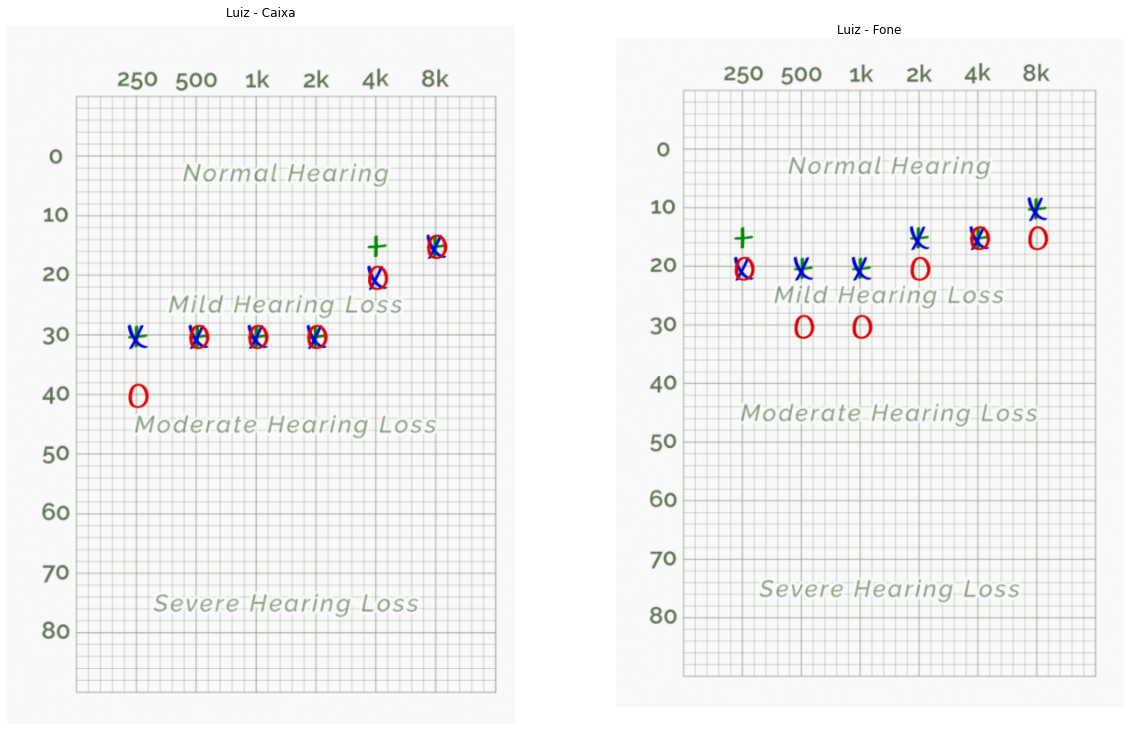

In [4]:
L_caixa = mpimg.imread(f"./audiogram_Luiz_caixa.png")
L_fone = mpimg.imread(f"./audiogram_Luiz_fone.png")

plt.figure(figsize=(20,40))
plt.subplot(1,2,1)
plt.imshow(L_caixa); plt.title("Luiz - Caixa"); plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(L_fone); plt.title("Luiz - Fone"); plt.axis('off')
plt.show()

## Faixa Audível

| Membro           	    | Heitor   	| Luiz 	|
| --------------------- | --------- | ----- |
| $$F_{aMinCaixa}$$   	| 40 Hz    	|      	|
| $$F_{aMáxCaixa}$$   	| 18000 Hz 	|      	|
| $$F_{aMinFone}$$    	| 20 Hz    	|      	|
| $$F_{aMáxFone}$$    	| 16500 Hz  |      	|
| $$F_{aMinCelular}$$ 	| 40 Hz    	|      	|
| $$F_{aMáxCelular}$$ 	| 16000 Hz 	|      	|

Diferenças são notadas pela capacidade do hardware em questão de reproduzir as frequências mais baixas ou mais altas.

## Mascaramento de Frequências

### Definindo frequências

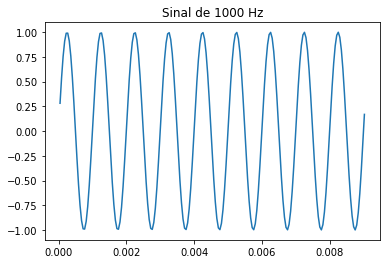

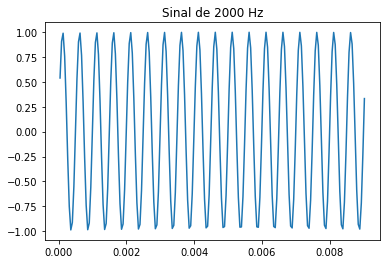

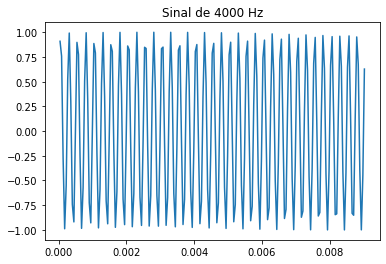

In [5]:
fs = 22050  # Frequência de amostragem
f = {1:{1:600,2:1000},2:{1:1200,2:2000},3:{1:2400,2:4000}}
tf = np.linspace(0, 0.2*fs, num=np.int16(0.2*fs))   # Intervalo de 200ms 
sil = np.zeros((1,2205))  # 100 ms de silêncio
h = {}
# Gradiente, fator de 3dB
fat3dB = math.pow(10,0.3)
Nloop = 8
atenuacao = np.linspace(0,-24,num=Nloop+1)

for i in f:
  h[i] = {}
  for j in f[i]:
    h[i][j] = np.sin(2*np.pi*f[i][j]*tf/fs)
  plt.figure(); plt.plot(tf[1:200]/fs,h[i][j][1:200]); plt.title(f'Sinal de {f[i][j]} Hz')

In [6]:
for i in f:
  for j in f[i]:
    print(f"Sinal {f[i][j]} Hz:")
    aux = IPython.display.Audio(data=h[i][j], rate=fs, autoplay=True)
    IPython.display.display(aux)
    time.sleep(1)

Sinal 600 Hz:


Sinal 1000 Hz:


Sinal 1200 Hz:


Sinal 2000 Hz:


Sinal 2400 Hz:


Sinal 4000 Hz:


### 600 Hz versus 1 kHz

In [7]:
k = 1

#### Sinal com frequência f1 mascarando f2

In [8]:
# Gradiente, fator de 3dB
fat = 1
s1 = np.concatenate( (h[k][1], sil), axis=None)
s2 = np.concatenate( (h[k][2], sil), axis=None)
for i in range(0, Nloop+1):
  fmask1 = np.concatenate( (s1, s2), axis=None)
  print("{}) Atenuação de tom de {}Hz por {:.1f} dB".format(i+1,f[k][1],atenuacao[i]))
  padrao = IPython.display.Audio(data=fmask1, rate=fs, autoplay=True)
  IPython.display.display(padrao)
  time.sleep(5)
  fat = fat*fat3dB
  s2 = s2/fat
print("===> PODE TOCAR NO PADRÃO DESEJADO, PARA CONFERIR")


1) Atenuação de tom de 600Hz por 0.0 dB


2) Atenuação de tom de 600Hz por -3.0 dB


3) Atenuação de tom de 600Hz por -6.0 dB


4) Atenuação de tom de 600Hz por -9.0 dB


5) Atenuação de tom de 600Hz por -12.0 dB


6) Atenuação de tom de 600Hz por -15.0 dB


7) Atenuação de tom de 600Hz por -18.0 dB


8) Atenuação de tom de 600Hz por -21.0 dB


9) Atenuação de tom de 600Hz por -24.0 dB


===> PODE TOCAR NO PADRÃO DESEJADO, PARA CONFERIR


#### Sinal com frequência f2 mascarando f1

In [9]:
# Gradiente, fator de 3dB
fat = 1
s1 = np.concatenate( (h[k][2], sil), axis=None)
s2 = np.concatenate( (h[k][1], sil), axis=None)
for i in range(0, Nloop+1):
  fmask1 = np.concatenate( (s1, s2), axis=None)
  print("{}) Atenuação de tom de {}Hz por {:.1f} dB".format(i+1,f[k][2],atenuacao[i]))
  padrao = IPython.display.Audio(data=fmask1, rate=fs, autoplay=True)
  IPython.display.display(padrao)
  time.sleep(5)
  fat = fat*fat3dB
  s2 = s2/fat
print("===> PODE TOCAR NO PADRÃO DESEJADO, PARA CONFERIR")


1) Atenuação de tom de 1000Hz por 0.0 dB


2) Atenuação de tom de 1000Hz por -3.0 dB


3) Atenuação de tom de 1000Hz por -6.0 dB


4) Atenuação de tom de 1000Hz por -9.0 dB


5) Atenuação de tom de 1000Hz por -12.0 dB


6) Atenuação de tom de 1000Hz por -15.0 dB


7) Atenuação de tom de 1000Hz por -18.0 dB


8) Atenuação de tom de 1000Hz por -21.0 dB


9) Atenuação de tom de 1000Hz por -24.0 dB


===> PODE TOCAR NO PADRÃO DESEJADO, PARA CONFERIR


### 1.2 kHz versus 2 kHz

In [10]:
k = 2

#### Sinal com frequência f1 mascarando f2

In [11]:
# Gradiente, fator de 3dB
fat = 1
s1 = np.concatenate( (h[k][1], sil), axis=None)
s2 = np.concatenate( (h[k][2], sil), axis=None)
for i in range(0, Nloop+1):
  fmask1 = np.concatenate( (s1, s2), axis=None)
  print("{}) Atenuação de tom de {}Hz por {:.1f} dB".format(i+1,f[k][1],atenuacao[i]))
  padrao = IPython.display.Audio(data=fmask1, rate=fs, autoplay=True)
  IPython.display.display(padrao)
  time.sleep(5)
  fat = fat*fat3dB
  s2 = s2/fat
print("===> PODE TOCAR NO PADRÃO DESEJADO, PARA CONFERIR")


1) Atenuação de tom de 1200Hz por 0.0 dB


2) Atenuação de tom de 1200Hz por -3.0 dB


3) Atenuação de tom de 1200Hz por -6.0 dB


4) Atenuação de tom de 1200Hz por -9.0 dB


5) Atenuação de tom de 1200Hz por -12.0 dB


6) Atenuação de tom de 1200Hz por -15.0 dB


7) Atenuação de tom de 1200Hz por -18.0 dB


8) Atenuação de tom de 1200Hz por -21.0 dB


9) Atenuação de tom de 1200Hz por -24.0 dB


===> PODE TOCAR NO PADRÃO DESEJADO, PARA CONFERIR


#### Sinal com frequência f2 mascarando f1

In [12]:
# Gradiente, fator de 3dB
fat = 1
s1 = np.concatenate( (h[k][2], sil), axis=None)
s2 = np.concatenate( (h[k][1], sil), axis=None)
for i in range(0, Nloop+1):
  fmask1 = np.concatenate( (s1, s2), axis=None)
  print("{}) Atenuação de tom de {}Hz por {:.1f} dB".format(i+1,f[k][2],atenuacao[i]))
  padrao = IPython.display.Audio(data=fmask1, rate=fs, autoplay=True)
  IPython.display.display(padrao)
  time.sleep(5)
  fat = fat*fat3dB
  s2 = s2/fat
print("===> PODE TOCAR NO PADRÃO DESEJADO, PARA CONFERIR")


1) Atenuação de tom de 2000Hz por 0.0 dB


2) Atenuação de tom de 2000Hz por -3.0 dB


3) Atenuação de tom de 2000Hz por -6.0 dB


4) Atenuação de tom de 2000Hz por -9.0 dB


5) Atenuação de tom de 2000Hz por -12.0 dB


6) Atenuação de tom de 2000Hz por -15.0 dB


7) Atenuação de tom de 2000Hz por -18.0 dB


8) Atenuação de tom de 2000Hz por -21.0 dB


9) Atenuação de tom de 2000Hz por -24.0 dB


===> PODE TOCAR NO PADRÃO DESEJADO, PARA CONFERIR


### 2.4 kHz versus 4 kHz

In [13]:
k = 3

#### Sinal com frequência f1 mascarando f2

In [14]:
# Gradiente, fator de 3dB
fat = 1
s1 = np.concatenate( (h[k][1], sil), axis=None)
s2 = np.concatenate( (h[k][2], sil), axis=None)
for i in range(0, Nloop+1):
  fmask1 = np.concatenate( (s1, s2), axis=None)
  print("{}) Atenuação de tom de {}Hz por {:.1f} dB".format(i+1,f[k][1],atenuacao[i]))
  padrao = IPython.display.Audio(data=fmask1, rate=fs, autoplay=True)
  IPython.display.display(padrao)
  time.sleep(5)
  fat = fat*fat3dB
  s2 = s2/fat
print("===> PODE TOCAR NO PADRÃO DESEJADO, PARA CONFERIR")


1) Atenuação de tom de 2400Hz por 0.0 dB


2) Atenuação de tom de 2400Hz por -3.0 dB


3) Atenuação de tom de 2400Hz por -6.0 dB


4) Atenuação de tom de 2400Hz por -9.0 dB


5) Atenuação de tom de 2400Hz por -12.0 dB


6) Atenuação de tom de 2400Hz por -15.0 dB


7) Atenuação de tom de 2400Hz por -18.0 dB


8) Atenuação de tom de 2400Hz por -21.0 dB


9) Atenuação de tom de 2400Hz por -24.0 dB


===> PODE TOCAR NO PADRÃO DESEJADO, PARA CONFERIR


#### Sinal com frequência f2 mascarando f1

In [15]:
# Gradiente, fator de 3dB
fat = 1
s1 = np.concatenate( (h[k][2], sil), axis=None)
s2 = np.concatenate( (h[k][1], sil), axis=None)
for i in range(0, Nloop+1):
  fmask1 = np.concatenate( (s1, s2), axis=None)
  print("{}) Atenuação de tom de {}Hz por {:.1f} dB".format(i+1,f[k][2],atenuacao[i]))
  padrao = IPython.display.Audio(data=fmask1, rate=fs, autoplay=True)
  IPython.display.display(padrao)
  time.sleep(5)
  fat = fat*fat3dB
  s2 = s2/fat
print("===> PODE TOCAR NO PADRÃO DESEJADO, PARA CONFERIR")


1) Atenuação de tom de 4000Hz por 0.0 dB


2) Atenuação de tom de 4000Hz por -3.0 dB


3) Atenuação de tom de 4000Hz por -6.0 dB


4) Atenuação de tom de 4000Hz por -9.0 dB


5) Atenuação de tom de 4000Hz por -12.0 dB


6) Atenuação de tom de 4000Hz por -15.0 dB


7) Atenuação de tom de 4000Hz por -18.0 dB


8) Atenuação de tom de 4000Hz por -21.0 dB


9) Atenuação de tom de 4000Hz por -24.0 dB


===> PODE TOCAR NO PADRÃO DESEJADO, PARA CONFERIR


### Resultados

| Membro          	| Heitor (fone)	| Luiz ()	|
|:-----------------:|:-------------:|:-------:|
| 600 Hz > 1 kHz  	| -15 dB       	|      	  |
| 1 kHz > 600 Hz  	| -15 dB       	|      	  |
| 1.2 kHz > 2 kHz 	| -15 dB       	|      	  |
| 2 kHz > 1.2 kHz 	| -15 dB       	|      	  |
| 2.4 kHz > 4 kHz 	| -15 dB       	|      	  |
| 4 kHz > 2.4 kHz 	| -15 dB       	|      	  |

# FIM